In [ ]:
# Import Libraries
!pip install emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (1)/spam.csv')

In [ ]:
df.head(50)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.shape


(5572, 2)

In [ ]:
df.isnull().sum()


,0
Category,0
Message,0


In [ ]:
df.duplicated().any()


np.True_

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
category_counts = df['Category'].value_counts()

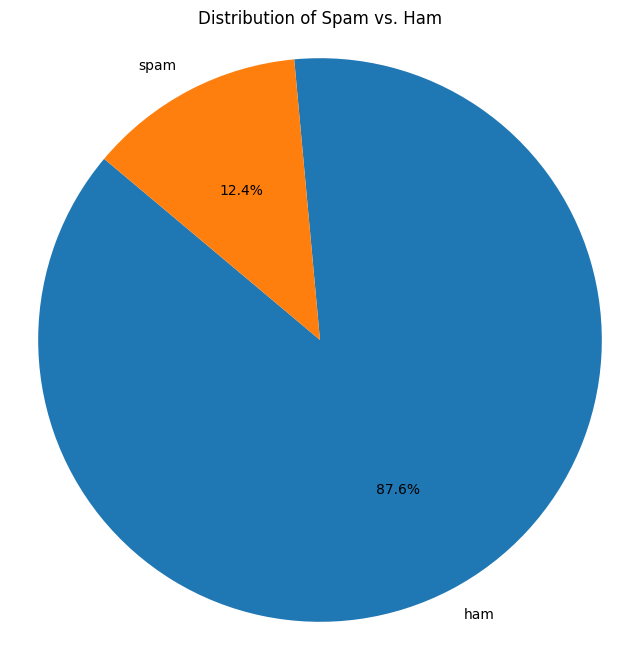

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')
plt.show()



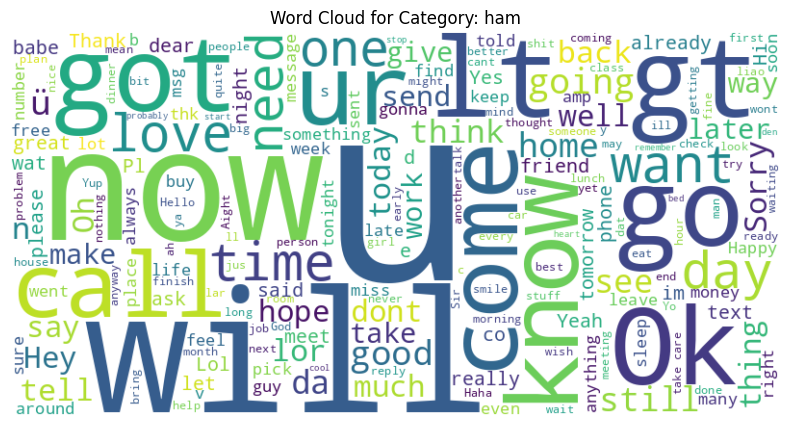

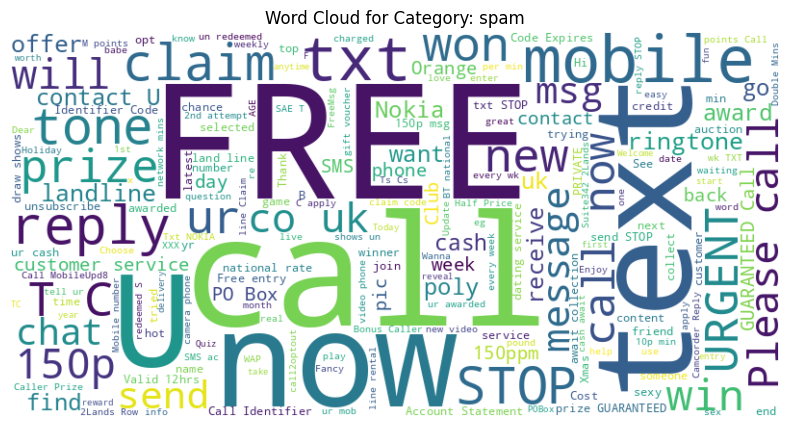

In [ ]:
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]

    text = ' '.join(filtered_df['Message'])


    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

df['Message'] = df['Message'].apply(remove_html_tags)
df.head(20)


,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

df['Message'] = df['Message'].apply(remove_urls)
df.head(20)


,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


In [ ]:
string.punctuation
punctuation = string.punctuation

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))
df['Message'] = df['Message'].apply(remove_punctuation)

In [ ]:
df.head(5)

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [ ]:
def remove_special_characters(text):

    pattern = r'[^a-zA-Z0-9\s]'

    clean_text = re.sub(pattern, '', text)

    return clean_text
df['Message'] = df['Message'].apply(remove_special_characters)

In [ ]:
def remove_numeric(text):
    return re.sub(r'\d+', '', text)
df['Message'] = df['Message'].apply(remove_numeric)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [ ]:
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [ ]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
     "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

df['Message'] = df['Message'].apply(replace_chat_words)

In [ ]:
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_emojis(text):
    return emoji.demojize(text)

df['Message'] = df['Message'].apply(remove_emojis)

In [ ]:
porter_stemmer = PorterStemmer()

df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
c

In [ ]:
# Calculate accuracy, precision and recall for each model

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

In [ ]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")


print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")



Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015, The Precision Score is 0.9724528699938659,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9563953488372093, The Precision Score is 0.9624374427464473,The Recall Score is 0.9563953488372093
The Confusion matrix is 
[[859  37]
 [  8 128]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8691860465116279, The Precision Score is 0.9179176426684793,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[776 120]
 [ 15 121]]


SVM:
The accuracy score of SVC is 0.8953488372093024, The Precision Score is 0.9066061336051144,The Recall Score is 0.8953488372093024
The Confusion matrix is 
[[896   0]
 [108  28]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9534883720930233, The Precision Score is 0.9518687645108085,The Recall Score is 0.9534883720930233
The Con

In [ ]:
print(f"Logistic Regression is doing really well with an accuracy of {lr_accuracy} and precision of {lr_precision}, showing that it's the top performer in our email spam detection task.")


Logistic Regression is doing really well with an accuracy of 0.9718992248062015 and precision of 0.9724528699938659, showing that it's the top performer in our email spam detection task.


In [ ]:
evaluation_data = {
    'Model': ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy],
    'Precision': [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision],
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)

                 Model  Accuracy  Precision
0  Logistic Regression  0.971899   0.972453
7              XGBoost  0.965116   0.964372
6    Gradient Boosting  0.962209   0.961283
1        MultinomialNB  0.956395   0.962437
3        Decision Tree  0.953488   0.951869
5        Random Forest  0.920543   0.927205
4                  SVM  0.895349   0.906606
2           GaussianNB  0.869186   0.917918


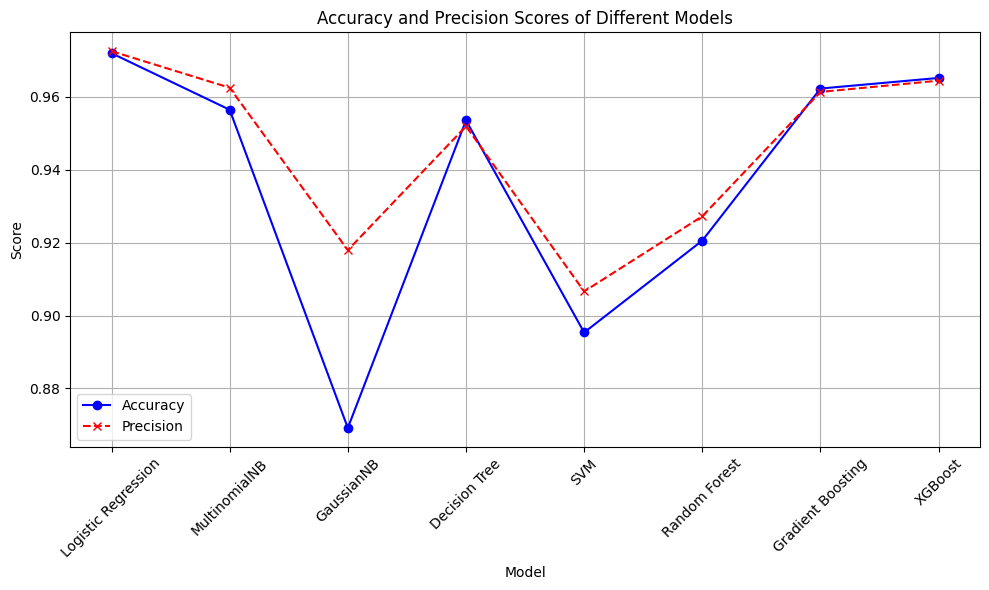

In [ ]:
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install joblib
import joblib

# Save the model and vectorizer
joblib.dump(lr_model, 'logistic_model.pkl')
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [ ]:
from google.colab import files
files.download('logistic_model.pkl')
files.download('count_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       896
        Spam       0.99      0.79      0.88       136

    accuracy                           0.97      1032
   macro avg       0.98      0.90      0.93      1032
weighted avg       0.97      0.97      0.97      1032

